In [1]:
# Import data science environment.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import sklearn
from sklearn import linear_model
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set_style('white')

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='internal gelsd'
)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Load and preview the data file.
credit_card = pd.read_csv('creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [3]:
# View central tendencies.
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


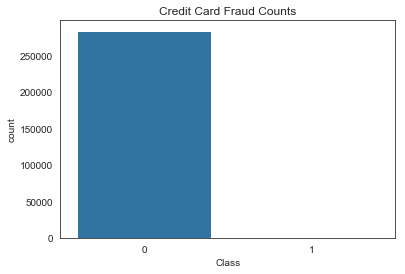

In [4]:
# View values counts.
sns.countplot('Class', data=credit_card)
plt.title('Credit Card Fraud Counts')
plt.show()

In [5]:
# Wow!  This data set is incredibly imbalanced!  Let's get counts.
pd.value_counts(credit_card['Class'])

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Let's check for any missing data.
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values, so next we will address the imbalanced classes.  I will up_sample fraudulent values and down_sample the real values.

1    100000
0    100000
Name: Class, dtype: int64

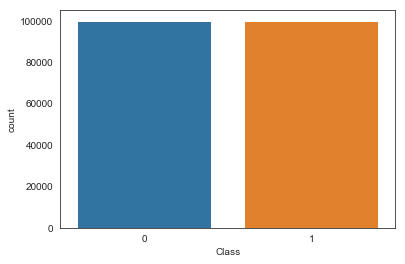

In [7]:
from sklearn.utils import resample

# Separate majority and minority classes.
cc_real = credit_card[credit_card.Class==0]
cc_fraud = credit_card[credit_card.Class==1]

# Upsample minority class.
cc_fraud_upsampled = resample(cc_fraud,
                              replace=True,
                              n_samples=100000,
                              random_state=15)

# Downsample majority class.
cc_real_downsampled = resample(cc_real,
                               replace=False,
                               n_samples=100000,
                               random_state=15)

# Combine upsampled minority class and downsampled majority class.
cc_sampled = pd.concat([cc_real_downsampled, cc_fraud_upsampled])

# Display new class counts.
sns.countplot(x='Class', data=cc_sampled)
cc_sampled.Class.value_counts()

In [8]:
cc_sampled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,...,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000,200000.000
mean,87790.370,-2.391,1.821,-3.520,2.268,-1.582,-0.699,-2.797,0.297,-1.295,...,0.355,0.010,-0.024,-0.052,0.020,0.026,0.084,0.038,104.267,0.500
std,48121.988,5.537,3.712,6.236,3.204,4.233,1.759,5.873,4.861,2.321,...,2.786,1.171,1.194,0.564,0.673,0.477,1.016,0.448,251.059,0.500
min,0.000,-46.855,-60.465,-32.965,-5.683,-40.428,-17.575,-43.557,-73.217,-13.434,...,-34.830,-9.499,-44.808,-2.823,-10.295,-2.605,-9.846,-8.314,0.000,0.000
25%,46057.000,-2.867,-0.140,-5.118,-0.107,-1.797,-1.575,-3.105,-0.203,-2.330,...,-0.171,-0.538,-0.239,-0.401,-0.318,-0.289,-0.063,-0.059,1.290,0.000
50%,80501.500,-0.781,0.963,-1.367,1.320,-0.430,-0.647,-0.649,0.158,-0.715,...,0.149,0.030,-0.033,0.007,0.050,-0.015,0.050,0.035,18.400,0.500
75%,134551.500,1.037,2.829,0.346,4.243,0.475,0.080,0.268,0.877,0.167,...,0.653,0.579,0.192,0.375,0.390,0.324,0.455,0.219,99.990,1.000
max,172783.000,2.420,22.058,4.188,16.875,24.656,23.918,44.054,20.007,10.393,...,27.203,10.503,18.947,3.712,5.852,3.517,12.152,15.942,18910.000,1.000


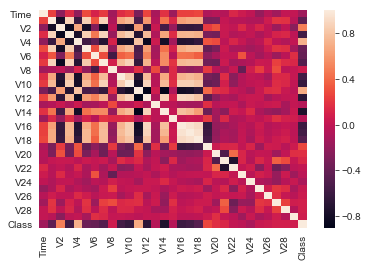

In [9]:
sns.heatmap(cc_sampled.corr())

In [10]:
# Split data into classes and training groups.
X = cc_sampled.drop(['Class'], 1)
y = cc_sampled.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [11]:
# Naive Bayes.
gnb = GaussianNB()
# Fit the model.
gnb.fit(X_train, y_train)
print(gnb)
y_pred_gnb = gnb.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gnb)
# Cross-validation.
gnb_score = cross_val_score(gnb, X, y, cv=10)
print(gnb_score)
# Classification report.
print(classification_report(y_test, y_pred_gnb))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gnb))

GaussianNB(priors=None, var_smoothing=1e-09)
[0.8641  0.86415 0.86685 0.86295 0.8624  0.86195 0.86775 0.86805 0.86735
 0.8601 ]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     25118
           1       0.99      0.75      0.85     24882

   micro avg       0.87      0.87      0.87     50000
   macro avg       0.89      0.87      0.87     50000
weighted avg       0.89      0.87      0.87     50000

[[24880   238]
 [ 6329 18553]]


In [12]:
# Build KNN model.
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# Fit the model.
knn.fit(X_train, y_train)
print(knn)
y_pred_knn = knn.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_knn)
# Cross-validation.
knn_score = cross_val_score(knn, X, y, cv=10)
print(knn_score)
# Classification report.
print(classification_report(y_test, y_pred_knn))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[0.9963  0.99715 0.9966  0.9968  0.99725 0.99655 0.99675 0.9971  0.99685
 0.9971 ]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25118
           1       0.99      1.00      1.00     24882

   micro avg       1.00      1.00      1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

[[24918   200]
 [    0 24882]]


In [13]:
# Build the Decision Tree model.
# Import tools.
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

dtc = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state=15
)
# Fit the model.
dtc.fit(X_train, y_train)
print(dtc)
y_pred_dtc = dtc.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_dtc)
# Cross-validation.
dtc_score = cross_val_score(dtc, X, y, cv=10)
print(dtc_score)
# Classification report.
print(classification_report(y_test, y_pred_dtc))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_dtc))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=15, splitter='best')
[0.89745 0.8952  0.90175 0.89625 0.89635 0.89455 0.8936  0.89775 0.896
 0.89375]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     25118
           1       0.90      0.89      0.90     24882

   micro avg       0.90      0.90      0.90     50000
   macro avg       0.90      0.90      0.90     50000
weighted avg       0.90      0.90      0.90     50000

[[22647  2471]
 [ 2630 22252]]


In [14]:
# Build the Random Forest model.
# Import tools.
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
# Fit the model.
rfc.fit(X_train, y_train)
print(rfc)
y_pred_rfc = rfc.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_rfc)
# Cross-validation.
rfc_score = cross_val_score(rfc, X, y, cv=10)
print(rfc_score)
# Classification report.
print(classification_report(y_test, y_pred_rfc))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_rfc))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
[0.99995 0.99985 0.99995 0.99995 0.99985 0.99995 1.      0.9999  0.99995
 0.99995]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25118
           1       1.00      1.00      1.00     24882

   micro avg       1.00      1.00      1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

[[25113     5]
 [    0 24882]]


In [15]:
# Build the Logistic Regression model.
lr = LogisticRegression(C=1e9)
# Fit the model.
lr.fit(X_train, y_train)
print(lr)
y_pred_lr = lr.predict(X_test)
# Accuracy score,
accuracy_score(y_test, y_pred_lr)
# Cross-validation.
lr_score = cross_val_score(lr, X, y, cv=10)
print(lr_score)
# Classification report.
print(classification_report(y_test, y_pred_lr))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_lr))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

[0.93695 0.93665 0.94595 0.93335 0.93685 0.9378  0.9398  0.9373  0.939
 0.9376 ]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25118
           1       0.97      0.92      0.94     24882

   micro avg       0.95      0.95      0.95     50000
   macro avg       0.95      0.95      0.95     50000
weighted avg       0.95      0.95      0.95     50000

[[24335   783]
 [ 1896 22986]]


In [16]:
# Build the SVC model.
svc = LinearSVC()
# Fit the model.
svc.fit(X_train, y_train)
print(svc)
y_pred_svc = svc.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_svc)
# Cross-validation.
svc_score = cross_val_score(svc, X, y, cv=10)
print(svc_score)
# Classification score.
print(classification_report(y_test, y_pred_svc))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_svc))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

[0.78865 0.54515 0.87905 0.88935 0.9003  0.8881  0.8959  0.8972  0.8919
 0.87915]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     25118
           1       0.94      0.84      0.89     24882

   micro avg       0.90      0.90      0.90     50000
   macro avg       0.90      0.89      0.89     50000
weighted avg       0.90      0.90      0.89     50000

[[23900  1218]
 [ 4031 20851]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
# Build the Gradient Boosting model.
gbm = ensemble.GradientBoostingClassifier()
# Fit the model.
gbm.fit(X_train, y_train)
print(gbm)
y_pred_gbm = gbm.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gbm)
# Cross-validation.
gbm_score = cross_val_score(gbm, X, y, cv=10)
print(gbm_score)
# Classification report.
print(classification_report(y_test, y_pred_gbm))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gbm))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
[0.9947  0.9927  0.9926  0.99205 0.99285 0.995   0.9937  0.9927  0.99455
 0.9928 ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25118
           1       0.99      0.99      0.99     24882

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000

[[24917   201]
 [  195 24687]]
